<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**column 'label' has values 1 - malicious , 0 - non-malicious**

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/project_data/malicious_prediction_data.csv')

In [6]:
print(df.shape)
print(df.dtypes)
df.head(5)

(534, 17)
address                      object
comment                      object
no_of_out_transactions      float64
tot_ether_sent              float64
no_of_in_transactions         int64
tot_ether_recieved          float64
monthly_out_txn             float64
monthly_in_txn              float64
active_months                 int64
eth_balance                 float64
time_b/w_out_txn            float64
time_b/w_in_txn             float64
tot_token_value_recieved    float64
tot_token_value_sent        float64
monthly_ether_sent          float64
monthly_ether_recieved      float64
label                         int64
dtype: object


,address,comment,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,monthly_out_txn,monthly_in_txn,active_months,eth_balance,time_b/w_out_txn,time_b/w_in_txn,tot_token_value_recieved,tot_token_value_sent,monthly_ether_sent,monthly_ether_recieved,label
0,0x983bda798a24720bb4fe3dba287ec352e7b440fc,Fake BITCAR platform token,0.0,0.000000,7,0.000000,0.000000,3.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
1,0x45029af827c652f47b1f678456b2cd009647c8ad,Fake BITCAR platform token,0.0,0.000000,5,0.000000,0.000000,2.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
2,0xcc02b920ae227f1be7d01fc241c27e5f74d40436,Fake copy of ROCK2 token,0.0,0.000000,3,0.000000,0.000000,3.0,1,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
3,0x181c71726f12ce2514e8b93019eb22645a79f966,Fake Whalesburg ICO support,47.0,32.078751,28,32.101368,9.400000,7.0,5,0.000000,229893.021277,3.781516e+05,0.0,0.0,6.415750,6.420274,1
4,0x2056d2e97cc9ad78cf527b382495a8b9704ce011,Fake Whalesburg ICO support,11.0,1.076784,6,1.082241,3.666667,3.0,3,0.000143,813860.636364,1.322250e+06,0.0,0.0,0.358928,0.360747,1


In [7]:
df.mean()

no_of_out_transactions      1.498427e+02
tot_ether_sent              1.859411e+03
no_of_in_transactions       6.531648e+01
tot_ether_recieved          1.873335e+03
monthly_out_txn             1.309968e+01
monthly_in_txn              1.601115e+01
active_months               5.425094e+00
eth_balance                 1.991260e+19
time_b/w_out_txn            8.846449e+05
time_b/w_in_txn             8.689263e+05
tot_token_value_recieved    1.740037e+57
tot_token_value_sent        2.170932e+17
monthly_ether_sent          1.525014e+02
monthly_ether_recieved      2.269928e+02
label                       5.000000e-01
dtype: float64

In [8]:
df.std()

no_of_out_transactions      2.486349e+03
tot_ether_sent              3.425423e+04
no_of_in_transactions       6.382657e+02
tot_ether_recieved          3.416540e+04
monthly_out_txn             1.004221e+02
monthly_in_txn              9.232221e+01
active_months               5.410799e+00
eth_balance                 2.978806e+20
time_b/w_out_txn            1.638365e+06
time_b/w_in_txn             1.970095e+06
tot_token_value_recieved    2.800965e+58
tot_token_value_sent        5.016685e+18
monthly_ether_sent          1.510494e+03
monthly_ether_recieved      1.698302e+03
label                       5.004688e-01
dtype: float64

In [9]:
df.columns

Index(['address', 'comment', 'no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
       'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
       'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved', 'label'],
      dtype='object')

In [11]:
df['comment'].value_counts()

Non Malicious                                                             267
0                                                                         142
Fake admin in Selfllery ICO                                                 8
Fake PlayHall support                                                       4
Trust trading 0.1ETH for 2ETH                                               4
                                                                         ... 
Fake Bluzelle crowdsale site                                                1
Fake Cindicator airdrop site asking for private keys                        1
PHISH_Scambots_3                                                            1
Ziber.io original contract address, called suicide after about 1000eth      1
MultiSigExploit-Hacker_main_2_f                                             1
Name: comment, Length: 102, dtype: int64

In [0]:
data = df.loc[:,'no_of_out_transactions':].copy()

In [0]:
# normalization

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["label"],axis = 1),),
        columns=['no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
       'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
       'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved'])

In [0]:
y = data['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,shuffle=True, stratify=y)

In [0]:
def model_evaluation(y_test,y_pred):
  from sklearn.metrics import classification_report
  print(classification_report(y_test,y_pred))
  from sklearn import metrics
  import seaborn as sns
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='euclidean')

knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

y_pred = knn.predict(X_test)


0.8651685393258427


              precision    recall  f1-score   support

           0       0.80      0.97      0.88        89
           1       0.96      0.76      0.85        89

    accuracy                           0.87       178
   macro avg       0.88      0.87      0.86       178
weighted avg       0.88      0.87      0.86       178



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


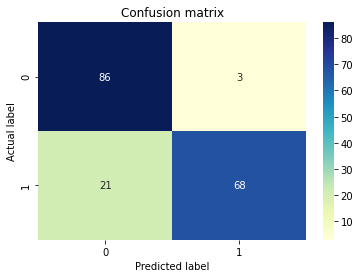

In [26]:
model_evaluation(y_test,y_pred)

In [27]:
data.iloc[0]['label']

1.0

In [29]:
knn.predict([data.iloc[0][:'monthly_ether_recieved']])

array([1])

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [34]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clf.score(X_test, y_test)

0.8764044943820225

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        89
           1       0.86      0.90      0.88        89

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



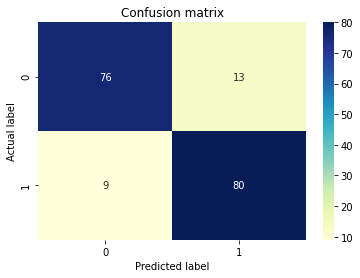

In [36]:
y_pred_lr = clf.predict(X_test)
model_evaluation(y_test,y_pred_lr)

# **Classification using Multi Layer Perceptron** 

In [0]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlp = MLPClassifier(solver='lbfgs', # optimiser
                    alpha=1e-5,     # L2 regularization
                    hidden_layer_sizes=(4, 15), # ( no. of layers, no. of neurons per layer )
                    random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.9044943820224719

In [40]:
mlp = MLPClassifier(solver='sgd', alpha=0,learning_rate_init=0.035,
                     hidden_layer_sizes=(6, 20), random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9044943820224719

In [41]:
mlp = MLPClassifier(solver='adam', alpha=1e-5,learning_rate_init=0.0034,
                     hidden_layer_sizes=(6, 18), random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9213483146067416

              precision    recall  f1-score   support

           0       0.89      0.97      0.92        89
           1       0.96      0.88      0.92        89

    accuracy                           0.92       178
   macro avg       0.92      0.92      0.92       178
weighted avg       0.92      0.92      0.92       178



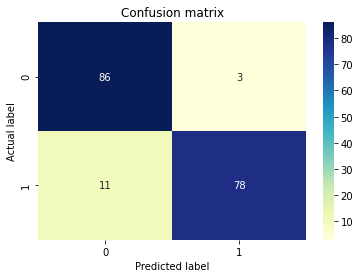

In [42]:
y_pred = mlp.predict(X_test)
model_evaluation(y_test,y_pred)

# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(max_depth=5, random_state=1)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.949438202247191

In [45]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        89
           1       0.98      0.92      0.95        89

    accuracy                           0.95       178
   macro avg       0.95      0.95      0.95       178
weighted avg       0.95      0.95      0.95       178



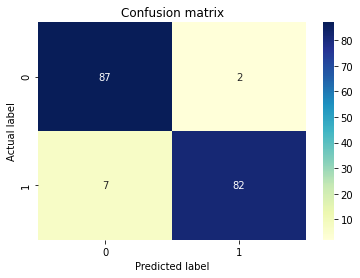

In [46]:
y_pred = rfc.predict(X_test)
model_evaluation(y_test,y_pred)